In [ ]:
!pip install xgboost lightgbm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('OneDrive/Desktop/train.csv')
test = pd.read_csv('OneDrive/Desktop/test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")



Train shape: (9021, 98)
Test shape: (10, 99)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9021 entries, 0 to 9020
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        9021 non-null   int64  
 1   D1                             9021 non-null   int64  
 2   D2                             9021 non-null   int64  
 3   D3                             9021 non-null   int64  
 4   D4                             9021 non-null   int64  
 5   D5                             9021 non-null   int64  
 6   D6                             9021 non-null   int64  
 7   D7                             9021 non-null   int64  
 8   D8                             9021 non-null   int64  
 9   D9                             9021 non-null   int64  
 10  E1                             7237 non-null   float64
 11  E10                            8015 non-null   float64
 12  E11                            8015 non-null   f

In [5]:
train.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [6]:
train_int=train[['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9']]

In [7]:
train_int.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9
count,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000,9021.000000
mean,0.031593,0.031593,0.047777,0.573994,0.190445,-0.238111,0.045671,0.142667,0.143000
std,0.174923,0.174923,0.213307,0.494522,0.392674,0.425951,0.208783,0.349752,0.350092
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000


| **Group** | **Meaning**                 | **New to Finance Interpretation**                                                                                                   |
| :-------- | :-------------------------- | :---------------------------------------------------------------------------------------------------------------------------------- |
| **M***    | Market Dynamics / Technical | Features derived from the S&P 500's own trading data (e.g., trading volume, internal market breadth).                               |
| **E***    | Macro Economic              | Data about the broader economy (e.g., unemployment, GDP growth, inflation).                                                         |
| **I***    | Interest Rate               | Features related to central bank policy (e.g., the federal funds rate).                                                             |
| **P***    | Price / Valuation           | Measures of how “cheap” or “expensive” the S&P 500 is compared to historical averages or earnings (e.g., Price-to-Earnings ratios). |
| **V***    | Volatility                  | How much the market price is moving up and down — a measure of risk.                                                                |
| **S***    | Sentiment                   | How optimistic or pessimistic investors are (e.g., derived from surveys or options trading).                                        |
| **MOM***  | Momentum                    | Measures of how strongly the market is trending in one direction.                                                                   |
| **D***    | Dummy / Binary              | Simple Yes/No or On/Off features (e.g., a holiday, a specific day of the week).                                                     |


In [8]:
pd.set_option('display.max_columns', None)
print(train.head(10))
train.shape

   date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  E1  E10  E11  E12  E13  E14  \
0        0   0   0   0   1   1   0   0   0   1 NaN  NaN  NaN  NaN  NaN  NaN   
1        1   0   0   0   1   1   0   0   0   1 NaN  NaN  NaN  NaN  NaN  NaN   
2        2   0   0   0   1   0   0   0   0   1 NaN  NaN  NaN  NaN  NaN  NaN   
3        3   0   0   0   1   0   0   0   0   0 NaN  NaN  NaN  NaN  NaN  NaN   
4        4   0   0   0   1   0   0   0   0   0 NaN  NaN  NaN  NaN  NaN  NaN   
5        5   0   0   0   1   0   0   0   0   0 NaN  NaN  NaN  NaN  NaN  NaN   
6        6   0   0   0   1   0   0   0   0   0 NaN  NaN  NaN  NaN  NaN  NaN   
7        7   0   0   0   1   0   0   0   0   0 NaN  NaN  NaN  NaN  NaN  NaN   
8        8   0   0   0   1   0   0   0   0   0 NaN  NaN  NaN  NaN  NaN  NaN   
9        9   0   0   0   1   0   0   0   0   0 NaN  NaN  NaN  NaN  NaN  NaN   

   E15  E16  E17  E18  E19  E2  E20  E3  E4  E5  E6  E7  E8  E9  I1  I2  I3  \
0  NaN  NaN  NaN  NaN  NaN NaN  NaN NaN NaN NaN NaN

(9021, 98)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9021 entries, 0 to 9020
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        9021 non-null   int64  
 1   D1                             9021 non-null   int64  
 2   D2                             9021 non-null   int64  
 3   D3                             9021 non-null   int64  
 4   D4                             9021 non-null   int64  
 5   D5                             9021 non-null   int64  
 6   D6                             9021 non-null   int64  
 7   D7                             9021 non-null   int64  
 8   D8                             9021 non-null   int64  
 9   D9                             9021 non-null   int64  
 10  E1                             7237 non-null   float64
 11  E10                            8015 non-null   float64
 12  E11                            8015 non-null   f

In [10]:
missing_df = pd.DataFrame({
    'Missing %': train.isnull().mean() * 100,
    'Missing Count': train.isnull().sum()
}).sort_values(by='Missing %', ascending=False)

# Filter out columns with 0% missing
missing_df = missing_df[missing_df['Missing %']>0]

missing_df.head(20)
missing_df.tail(20)


,Missing %,Missing Count
E12,11.151757,1006
E9,11.151757,1006
I1,11.151757,1006
I2,11.151757,1006
I3,11.151757,1006
M17,11.151757,1006
M16,11.151757,1006
M15,11.151757,1006
V2,11.151757,1006
M12,11.151757,1006


In [11]:
missing_df.count()

Missing %        85
Missing Count    85
dtype: int64

<Axes: title={'center': 'Top 100 Columns with Missing Data'}>

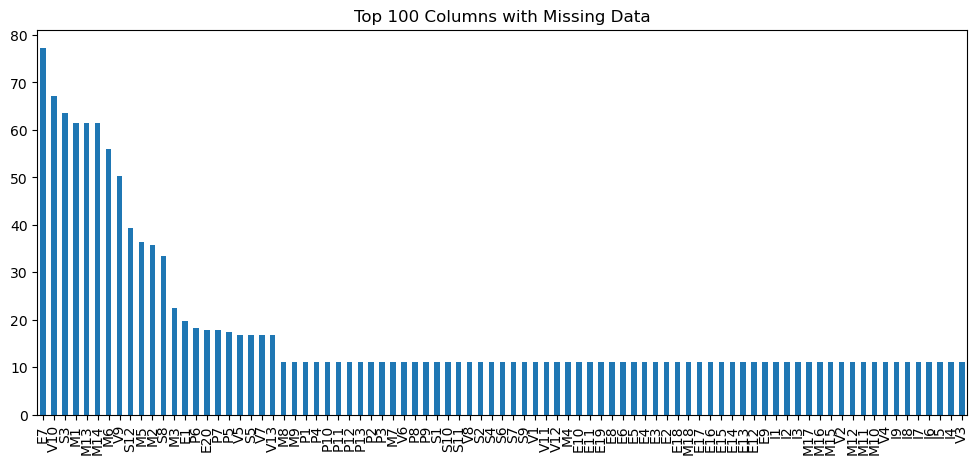

In [12]:
missing_df.head(100)['Missing %'].plot(kind='bar', figsize=(12, 5), title='Top 100 Columns with Missing Data')


In [13]:
# Filter out columns with 0% missing
missing_df = missing_df[missing_df['Missing %']>15]

missing_df.head(20)

,Missing %,Missing Count
E7,77.253076,6969
V10,67.054650,6049
S3,63.551713,5733
M1,61.489857,5547
M13,61.412260,5540
M14,61.412260,5540
M6,55.902893,5043
V9,50.315929,4539
S12,39.208513,3537
M5,36.392861,3283


<Axes: title={'center': 'Top 100 Columns with Missing Data'}>

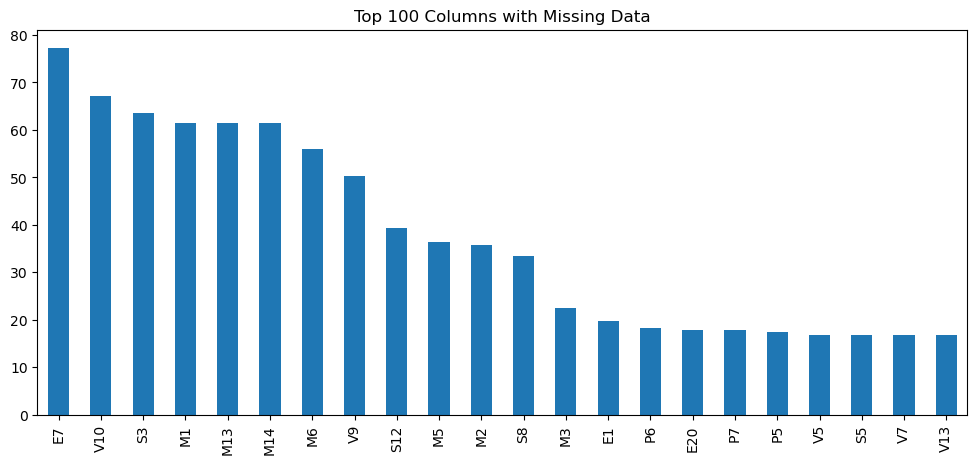

In [18]:
missing_df.head(100)['Missing %'].plot(kind='bar', figsize=(12, 5), title='Top 100 Columns with Missing Data')

In [15]:
# Compute correlation of all columns with the target
target_corr = train.corr(numeric_only=True)['market_forward_excess_returns'].sort_values(ascending=False)

# Display top and bottom correlations
print("Top 10 positively correlated features:\n")
display(target_corr.head(20))

print("\nTop 10 negatively correlated features:\n")
display(target_corr.tail(20))


Top 10 positively correlated features:



market_forward_excess_returns    1.000000
forward_returns                  0.999943
V13                              0.062395
M1                               0.046111
S5                               0.040010
D2                               0.033946
D1                               0.033946
M2                               0.033238
V10                              0.032635
V7                               0.031484
S12                              0.026134
D8                               0.024786
M17                              0.024591
E19                              0.023503
S6                               0.022029
M3                               0.017107
D4                               0.016943
V9                               0.016662
D5                               0.016611
D6                               0.016600
Name: market_forward_excess_returns, dtype: float64


Top 10 negatively correlated features:



E13   -0.009874
S8    -0.010134
P3    -0.011776
P11   -0.011951
S7    -0.012034
M18   -0.012197
S3    -0.018133
P10   -0.019878
M8    -0.021811
P12   -0.022374
P7    -0.022679
P5    -0.023036
M12   -0.024582
I2    -0.025176
P8    -0.029591
E12   -0.030927
E11   -0.032131
E7    -0.032294
S2    -0.037886
M4    -0.066600
Name: market_forward_excess_returns, dtype: float64

In [17]:
feature_groups = {
    'Market': [col for col in train.columns if col.startswith('M')],
    'Economic': [col for col in train.columns if col.startswith('E')],
    'Interest': [col for col in train.columns if col.startswith('I')],
    'Price': [col for col in train.columns if col.startswith('P')],
    'Volatility': [col for col in train.columns if col.startswith('V')],
    'Sentiment': [col for col in train.columns if col.startswith('S')],
    'Momentum': [col for col in train.columns if col.startswith('MOM')],
    'Dummy': [col for col in train.columns if col.startswith('D')],
}

print("\nFeature group counts:")
for group, cols in feature_groups.items():
    print(f"  {group:12s}: {len(cols):3d} features")


Feature group counts:
  Market      :  18 features
  Economic    :  20 features
  Interest    :   9 features
  Price       :  13 features
  Volatility  :  13 features
  Sentiment   :  12 features
  Momentum    :   0 features
  Dummy       :   9 features
